In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import Symbol
from sympy.solvers import solve
%matplotlib inline

# APARTADO B

In [73]:
#condición para que delta sea cero en apartado b en función de k y b
def DeltaB():
    k = Symbol('k')
    b = Symbol('b')
    
    w = solve(((2 * b / k) - 1 - (k ** 2)) ** 2 - (2 * k) ** 2, b)
    return w
DeltaB()

[k*(k**2 - 2*k + 1)/2, k*(k**2 + 2*k + 1)/2]

<ipython-input-136-e7efafa189ac>:14: RuntimeWarning: invalid value encountered in sqrt
  lm = 0.5 * (tr - np.sqrt(delta))
<ipython-input-136-e7efafa189ac>:15: RuntimeWarning: invalid value encountered in sqrt
  lmas = 0.5 * (tr + np.sqrt(delta))


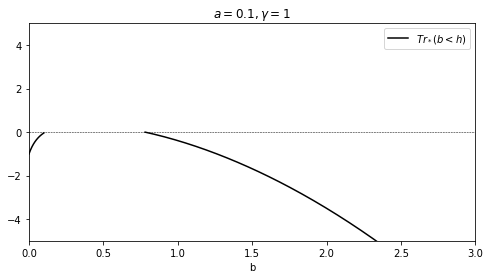

In [136]:
#funcion que me pinta la traza, determinante y todo, en función de k para gamma, y a fijos
def Tr(g, a, figx=None, figy=None):
    
    b = np.linspace(0, 10, 1000)
    k = a + b
    
    k0 = 2 * k
    
    tr= g * ((2 * b / k) - 1 - (k ** 2))
    det = (g ** 2) * (k ** 2)
    
    delta = (tr ** 2) - (4 * det)
    
    lm = 0.5 * (tr - np.sqrt(delta))
    lmas = 0.5 * (tr + np.sqrt(delta))
    
    h = k * (1 + (k ** 2)) / 2
    

    
    #figx.plot (b[(np.abs(b - h)<(k ** 2))], tr[(np.abs(b - h)<(k ** 2))], 'cyan', label=(r'$Tr_*(|b-h|<k^2)(b<h)$'))
    #figx.plot (b[(np.abs(b - h)<(k ** 2))&(b>h)], tr[(np.abs(b - h)<(k ** 2))&(b>h)], 'k', label=(r'$Tr_*(|b-h|<k^2)(b>h)$'))

    figx.plot(b[(b<h)&(b<0.5)], tr[(b<h)&(b<0.5)], 'k', label=(f'$Tr_*(b<h)$'))
    figx.plot(b[(b<h)&(b>0.5)], tr[(b<h)&(b>0.5)], 'k')

    #figx.plot(b, det, 'g', label=(r'$Det_*$'))

    #figx.plot(b[np.abs(b - h)<(k ** 2)], delta[np.abs(b - h)<(k ** 2)], 'orange', label=(r'$\Delta_*(|b-h|<k^2)$'))
        
    figx.axhline(0, color='k', lw=0.5, ls='--')

    figx.set_title(f'$a={a}, \gamma={g}$')
    figx.set_xlabel('b')
    figx.set_ylim(-5, 5)
    figx.set_xlim(0, 3)
    figx.legend(loc=1)
    
fig, fig1 = plt.subplots(1, 1, figsize=(8,4))

Tr(1, 0.1, figx=fig1)

plt.savefig('traza_4a1.png')

<ipython-input-130-a13644d61665>:14: RuntimeWarning: invalid value encountered in sqrt
  lm = 0.5 * (tr - np.sqrt(delta))
<ipython-input-130-a13644d61665>:15: RuntimeWarning: invalid value encountered in sqrt
  lmas = 0.5 * (tr + np.sqrt(delta))


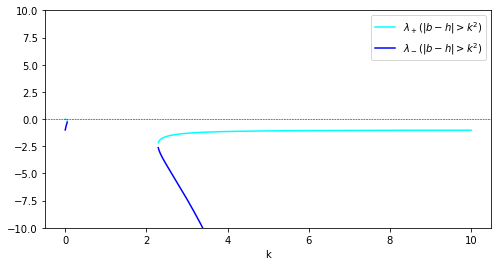

In [130]:
#autovalores para gamma y b fijos variando a
def auto(g, a, figx=None):
    
    b = np.linspace(0, 10, 1000)
    k = a + b
    
    k0 = 2 * k
    
    tr= g * ((2 * b / k) - 1 - (k ** 2))
    det = (g ** 2) * (k ** 2)
    
    delta = (tr ** 2) - (4 * det)
    
    lm = 0.5 * (tr - np.sqrt(delta))
    lmas = 0.5 * (tr + np.sqrt(delta))
    
    h = k * (1 + (k ** 2)) / 2
    
    figx.plot(b, lmas, 'cyan', label=(r'$\lambda_+(|b-h|>k^2)$'))
    figx.plot(b, lm, 'b', label=(r'$\lambda_- (|b-h|>k^2)$'))


    
    figx.axhline(0, color='k', lw=0.5, ls='--')
    figx.set_xlabel('k')
    figx.set_ylim(-10,10)
    figx.legend()
    
fig, fig2 = plt.subplots(1, 1, figsize=(8,4))
auto(1, 0.1, figx=fig2)

plt.savefig('autovalores_4a.png')

# APARTADO D

In [156]:
#condiciones para que det(h) sea =0
def condiciones():
    g = Symbol('gamma')
    k = Symbol('k')
    d = Symbol('d')
    b = Symbol('b')
    q = Symbol('q')
    
    w = solve((g ** 2) * ((k ** 2) + ((q ** 2) * (k ** 2 + (d * (1 - (2 * b / k) + (q **2)))))), b)
    return w
    
condiciones() 

[k*q**2/2 + k/2 + k**3/(2*d) + k**3/(2*d*q**2)]

<ipython-input-168-eb3fbcfaa62c>:14: RuntimeWarning: invalid value encountered in sqrt
  lm = 0.5 * (tr - np.sqrt(delta))
<ipython-input-168-eb3fbcfaa62c>:15: RuntimeWarning: invalid value encountered in sqrt
  lmas = 0.5 * (tr + np.sqrt(delta))


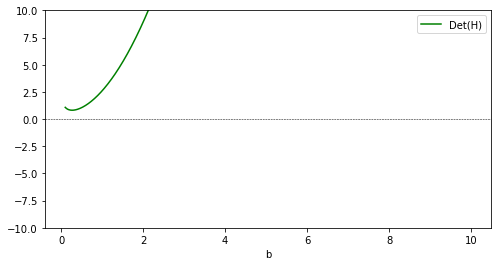

In [168]:
#autovalores de H, determinante, traza, etc, para todo fijo menos b
def autoh(g, a, q, d, figx=None):
    b = np.linspace(0.1, 10, 1000)
    k = a + b
    
    xi = (2 * b / k) - 1 - (k ** 2)
    k0 = 2 * k
    
    tr= g * xi - (1 + d) * (q ** 2)
    det = (g ** 2) * ((k ** 2) + ((q ** 2) * (k ** 2 + (d * (1 - (2 * b / k) + (q **2))))))
    
    delta = (tr ** 2) - (4 * det)
    
    lm = 0.5 * (tr - np.sqrt(delta))
    lmas = 0.5 * (tr + np.sqrt(delta))

    
    h = 0.5 * (k + (k ** 3))
    
    e = k * ((q ** 2) + 1 + ((k ** 2) / 2) * (1 + (1 / (q ** 2))))
    
    #figx.plot(b, lmas, 'k', label=('$\lambda_+$'))
    #figx.plot(b, lm,'b', label=('$\lambda_-$'))
    
    #figx.plot(b, delta, 'r', label=('$\Delta_H$'))
    #figx.plot(b, tr, label=('Tr(H)'))
    figx.plot(b[b<e], det[b<e], 'g', label=('Det(H)'))



    
    figx.axhline(0, color='k', lw=0.5, ls='--')
    figx.set_xlabel('b')
    figx.set_ylim(-10,10)
    figx.legend()
    
fig, fig3 = plt.subplots(1, 1, figsize=(8,4))
autoh(1, 0.1, 1, 1, figx=fig3)

plt.savefig('estabilidad_4d.png')

# APARTADO E

In [171]:
#♥obtengo q_c
def mindet():
    q = Symbol('q')
    k = Symbol('k')
    d = Symbol('d')
    b = Symbol('b')
    
    w = solve(((2 * q) * ((k ** 2) + d * (1 - (2 * b / k) + 2 * (q ** 2)))), q)
    return w
mindet()

[0, -sqrt(4*b/k - 2 - 2*k**2/d)/2, sqrt(4*b/k - 2 - 2*k**2/d)/2]

<ipython-input-209-94623ddce38f>:6: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt((4 * b / k) - 2 - (2 * k ** 2 / d)) / 2
<ipython-input-209-94623ddce38f>:17: RuntimeWarning: invalid value encountered in sqrt
  lm = 0.5 * (tr - np.sqrt(delta))
<ipython-input-209-94623ddce38f>:18: RuntimeWarning: invalid value encountered in sqrt
  lmas = 0.5 * (tr + np.sqrt(delta))


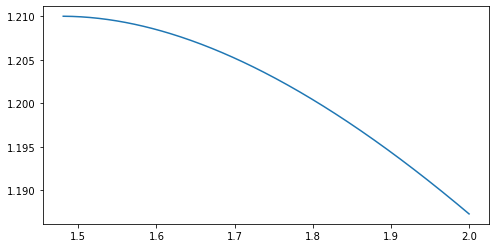

In [209]:
#calculo el determinante de H en funcion de qc
def detH(g, b, d, figx=None):
    k = np.linspace(0.1, 2, 1000)
    #k = a + b
    
    q = np.sqrt((4 * b / k) - 2 - (2 * k ** 2 / d)) / 2

    
    xi = (2 * b / k) - 1 - (k ** 2)
    k0 = 2 * k
    
    tr= (g * xi) - (1 + d) * (q ** 2)
    det = (g ** 2) * ((k ** 2) + ((q ** 2) * (k ** 2 + (d * (1 - (2 * b / k) + (q **2))))))
    
    delta = (tr ** 2) - (4 * det)
    
    lm = 0.5 * (tr - np.sqrt(delta))
    lmas = 0.5 * (tr + np.sqrt(delta))

    
    h = 0.5 * (k + (k ** 3))
    
    figx.plot(k, det)
    
fig, fig4 = plt.subplots(1, 1, figsize=(8,4))

detH(1, 1, 0.1, figx=fig4)

In [206]:
#condicon para que det(H,q_c)=0
def detqc():
    k = Symbol('k')
    d = Symbol('d')
    b = Symbol('b')
    g = Symbol('g')
    
    q = 0.5 * ((4 * b / k) - 2 - (2 * k ** 2 / d)) ** (1 / 2)
    
    w = solve((g ** 2) * ((k ** 2) + ((q ** 2) * (k ** 2 + (d * (1 - (2 * b / k) + (q **2)))))), d)
    return w

detqc()
    

[0.25*k**3*(2.0*b + k)/(b - 0.5*k)**2 - 2.82842712474619*sqrt(b*k**7)/(-4.0*b**2 + 4.0*b*k - k**2),
 0.25*k**3*(2.0*b + k)/(b - 0.5*k)**2 + 2.82842712474619*sqrt(b*k**7)/(-4.0*b**2 + 4.0*b*k - k**2)]